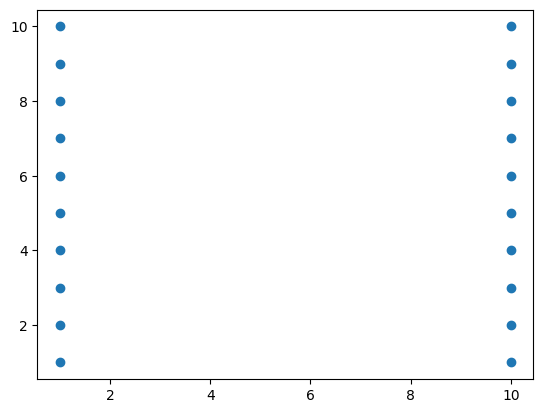

In [1]:
import numpy as np
import matplotlib.pyplot as plot

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

plot.scatter(numarray[:, 0], numarray[:, 1])
plot.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
print(clusters.labels_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


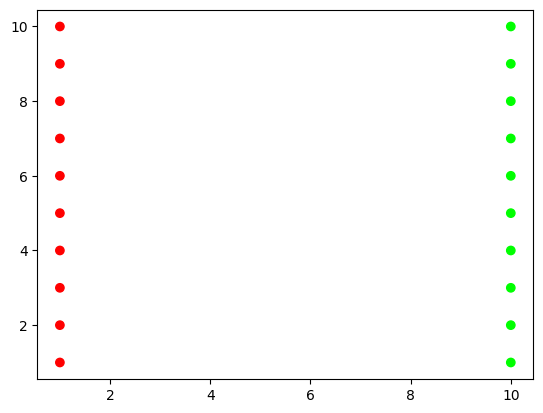

In [3]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

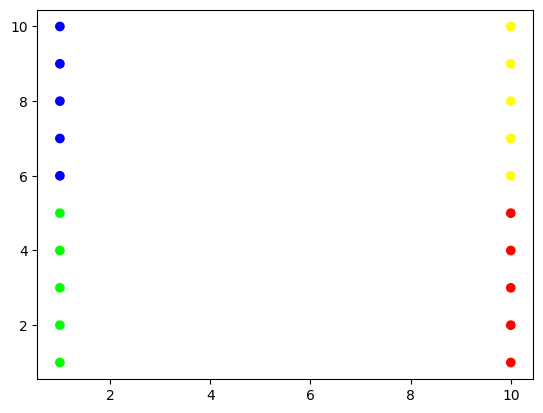

In [9]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

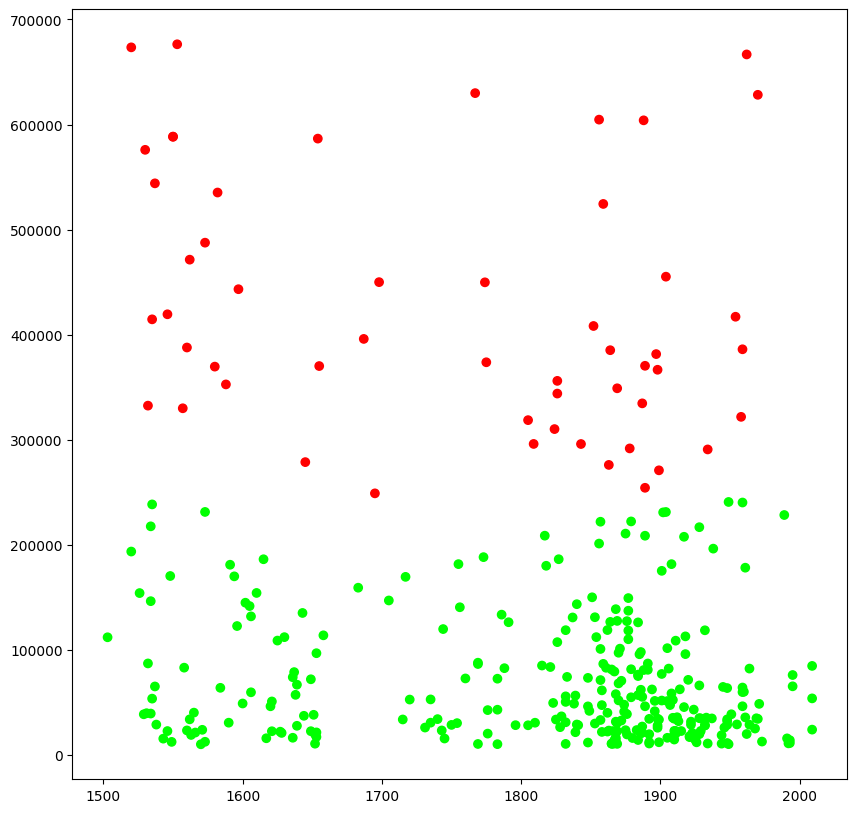

In [18]:
from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

# Spécifier l'encodage UTF-8 lors de l'ouverture du fichier
with open("data/citypopulation.json", encoding='utf-8') as file:
    data = json.load(file)

dataframe = json_normalize(data)
le = LabelEncoder()
dataframe["cityLabel"] = le.fit_transform(dataframe["cityLabel"])
dataframe = dataframe.astype(
    dtype={"year": "<i4", "cityLabel": "<U200", "population": "i"}
)
dataframe = dataframe.loc[dataframe["year"] > 1500]
# dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[["year", "population"]]
clusters = KMeans(n_clusters=2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.rcParams["figure.figsize"] = [10, 10]
plot.scatter(
    yearPopulation["year"], yearPopulation["population"], c=colors[clusters.labels_]
)
plot.show()


IndexError: index 5 is out of bounds for axis 0 with size 5

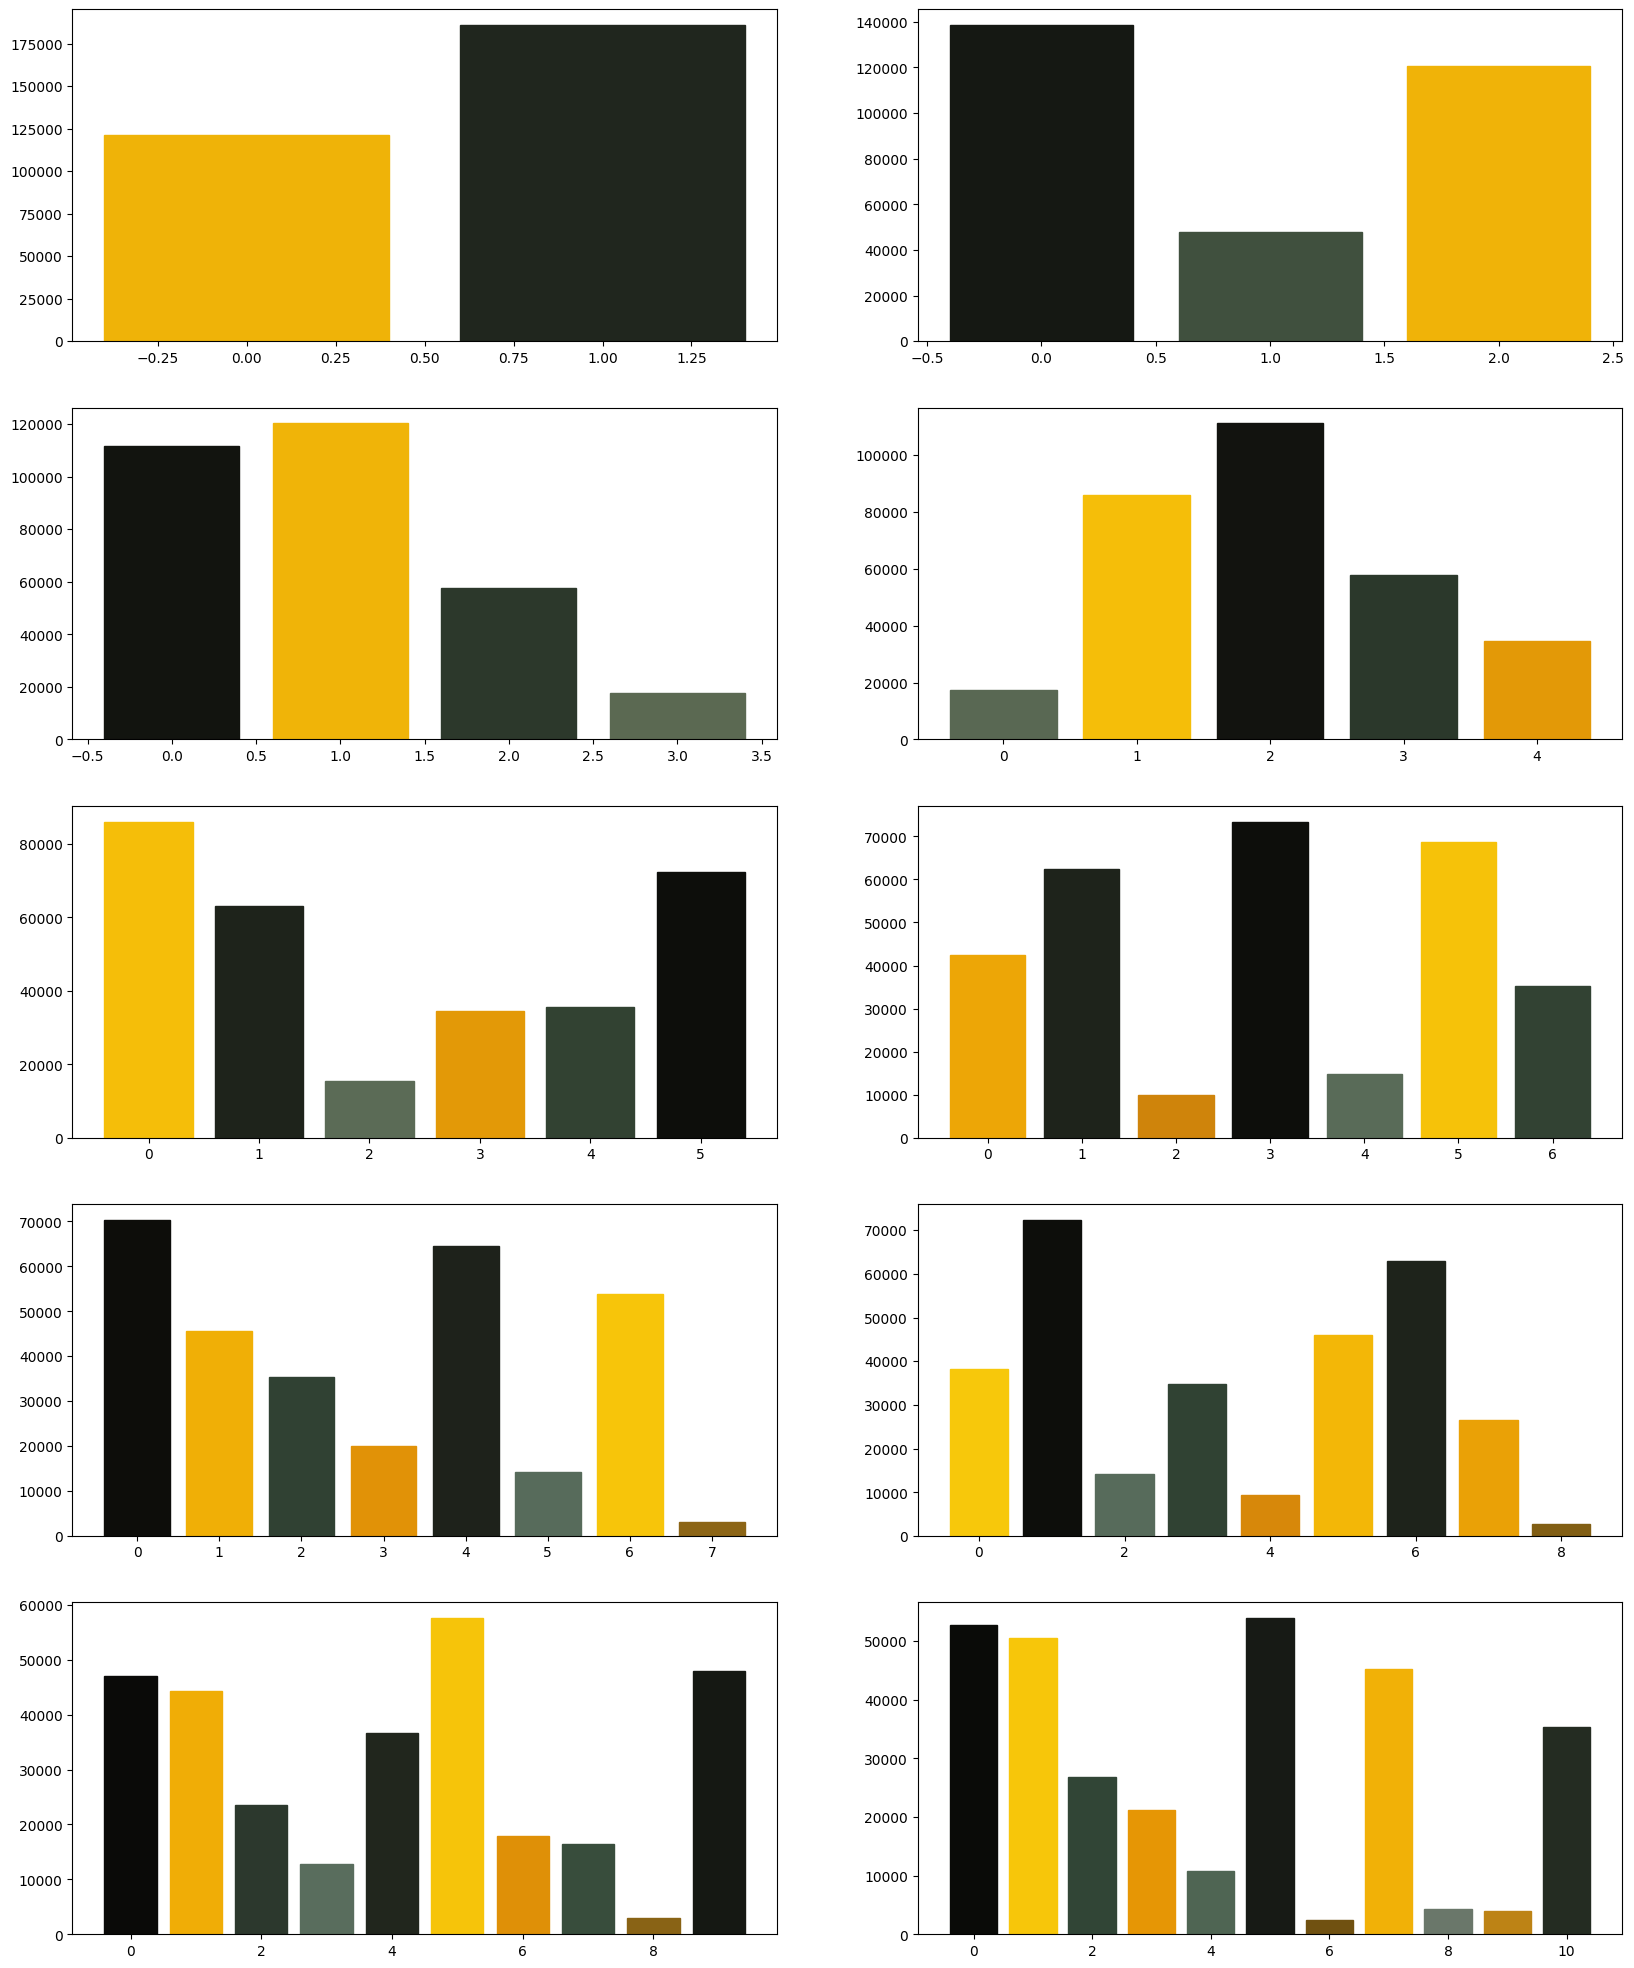

In [20]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

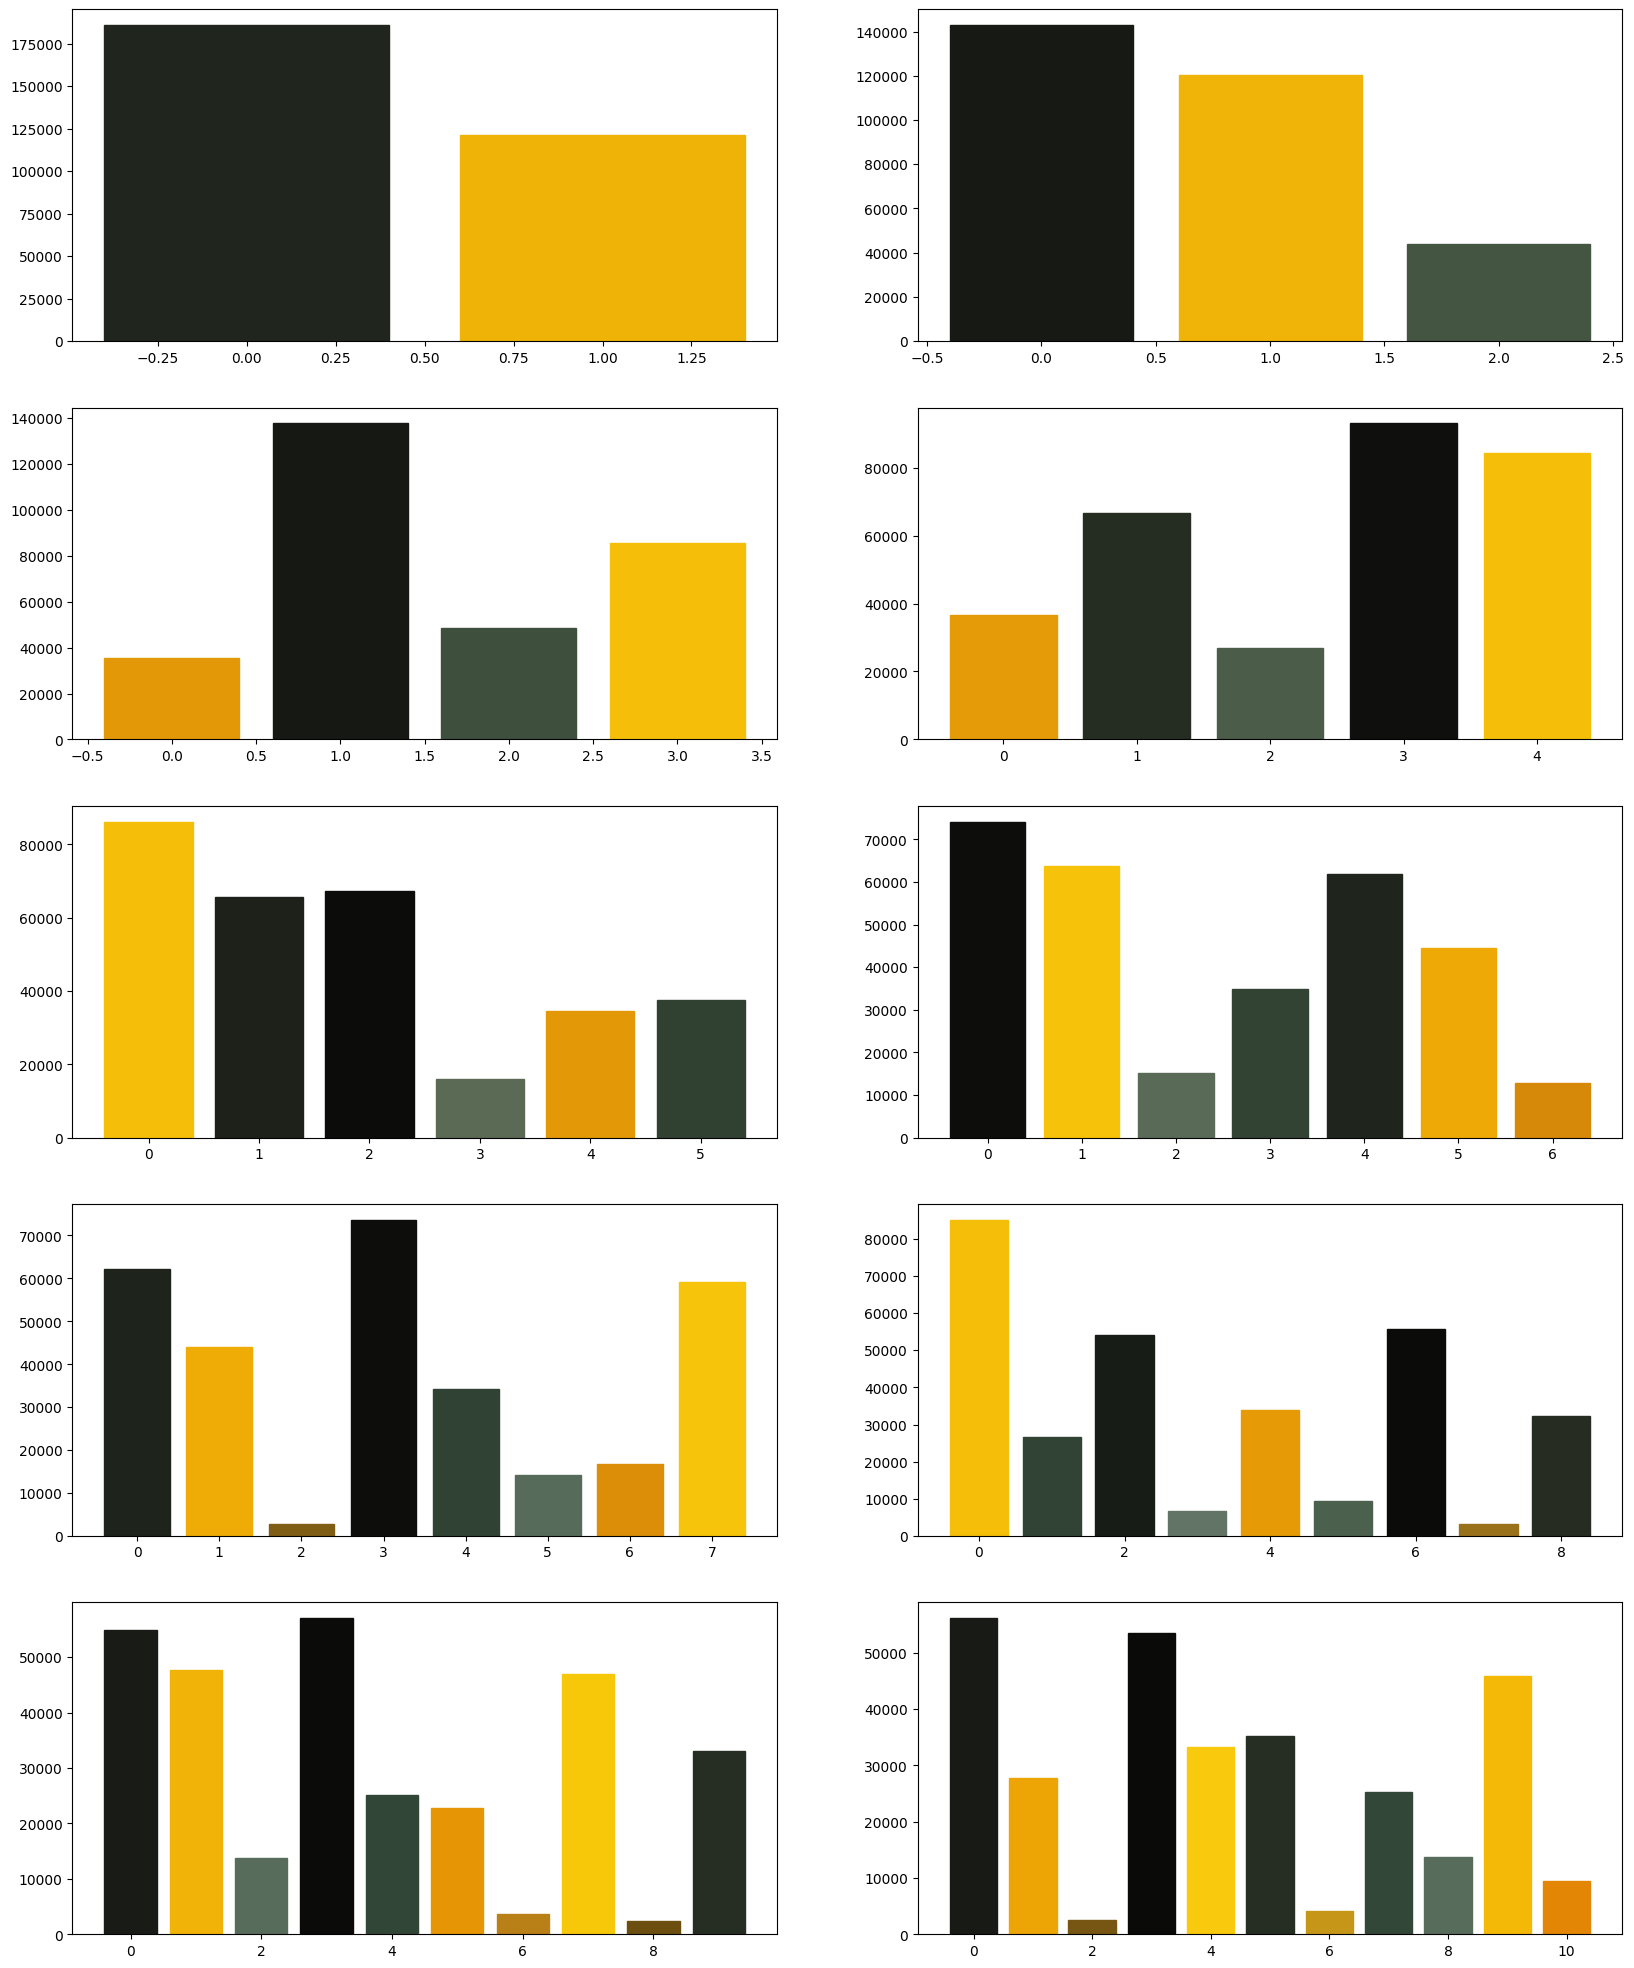

In [22]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

Total time:  1 : 0.1018075942993164
Total time:  2 : 0.18652558326721191
Total time:  3 : 0.2820096015930176
Total time:  4 : 0.4100339412689209
Total time:  5 : 0.41766357421875
Total time:  6 : 0.41121554374694824
Total time:  7 : 0.4318366050720215
Total time:  8 : 0.6344137191772461
Total time:  9 : 0.9454669952392578
Total time:  10 : 0.654857873916626
Total time:  11 : 0.720095157623291
Total time:  12 : 0.690096378326416
Total time:  13 : 0.8940324783325195
Total time:  14 : 1.0501649379730225
Total time:  15 : 1.1177196502685547
Total time:  16 : 1.1071107387542725
Total time:  17 : 1.83192777633667
Total time:  18 : 1.3426258563995361
Total time:  19 : 1.146505355834961


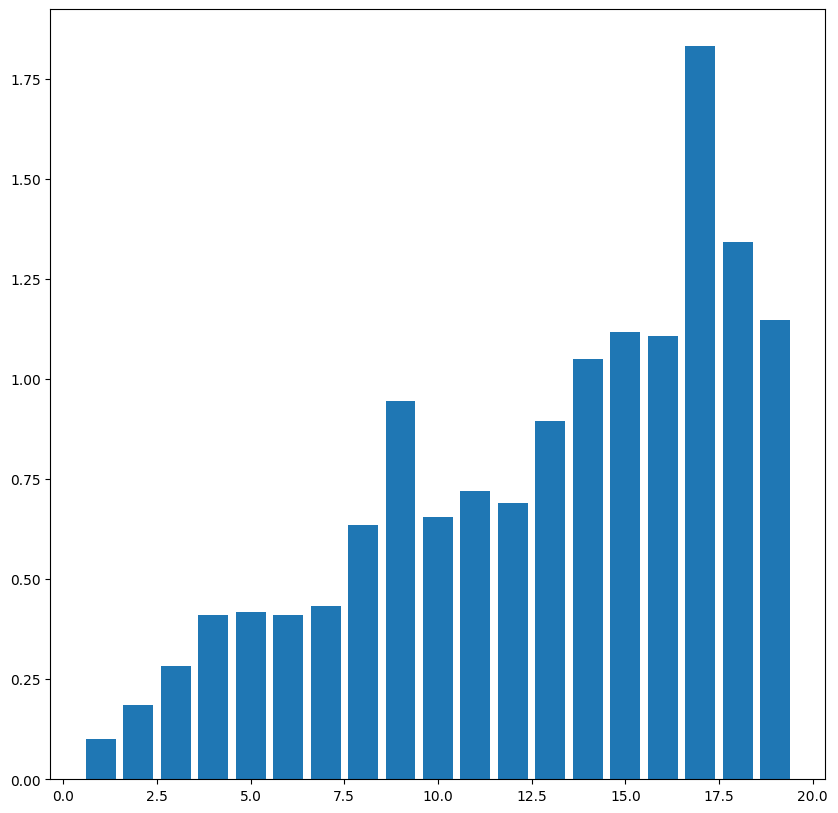

In [24]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Total time:  1 : 0.16695332527160645
Total time:  2 : 0.10099983215332031
Total time:  3 : 1.0635719299316406
Total time:  4 : 1.8461484909057617
Total time:  5 : 1.4926226139068604
Total time:  6 : 0.649390459060669
Total time:  7 : 0.8017761707305908
Total time:  8 : 0.34082889556884766
Total time:  9 : 0.6122784614562988
Total time:  10 : 0.6767807006835938
Total time:  11 : 0.9577851295471191
Total time:  12 : 0.1045229434967041
Total time:  13 : 0.10502934455871582
Total time:  14 : 1.3319692611694336
Total time:  15 : 0.5980148315429688
Total time:  16 : 2.095308780670166
Total time:  17 : 0.6453871726989746
Total time:  18 : 1.0932927131652832
Total time:  19 : 0.8664133548736572


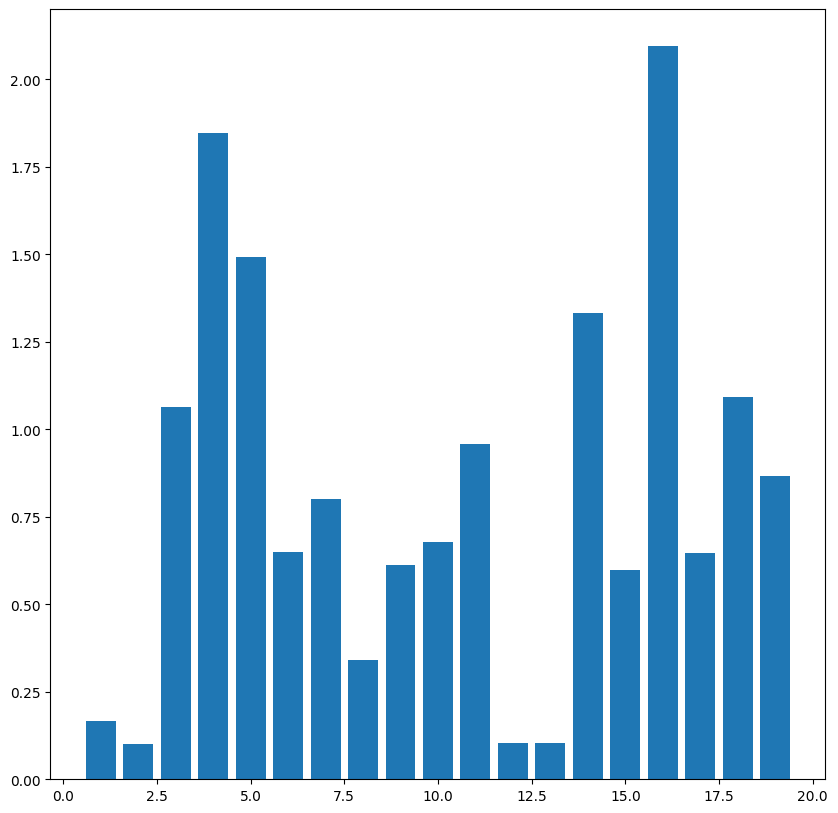

In [25]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

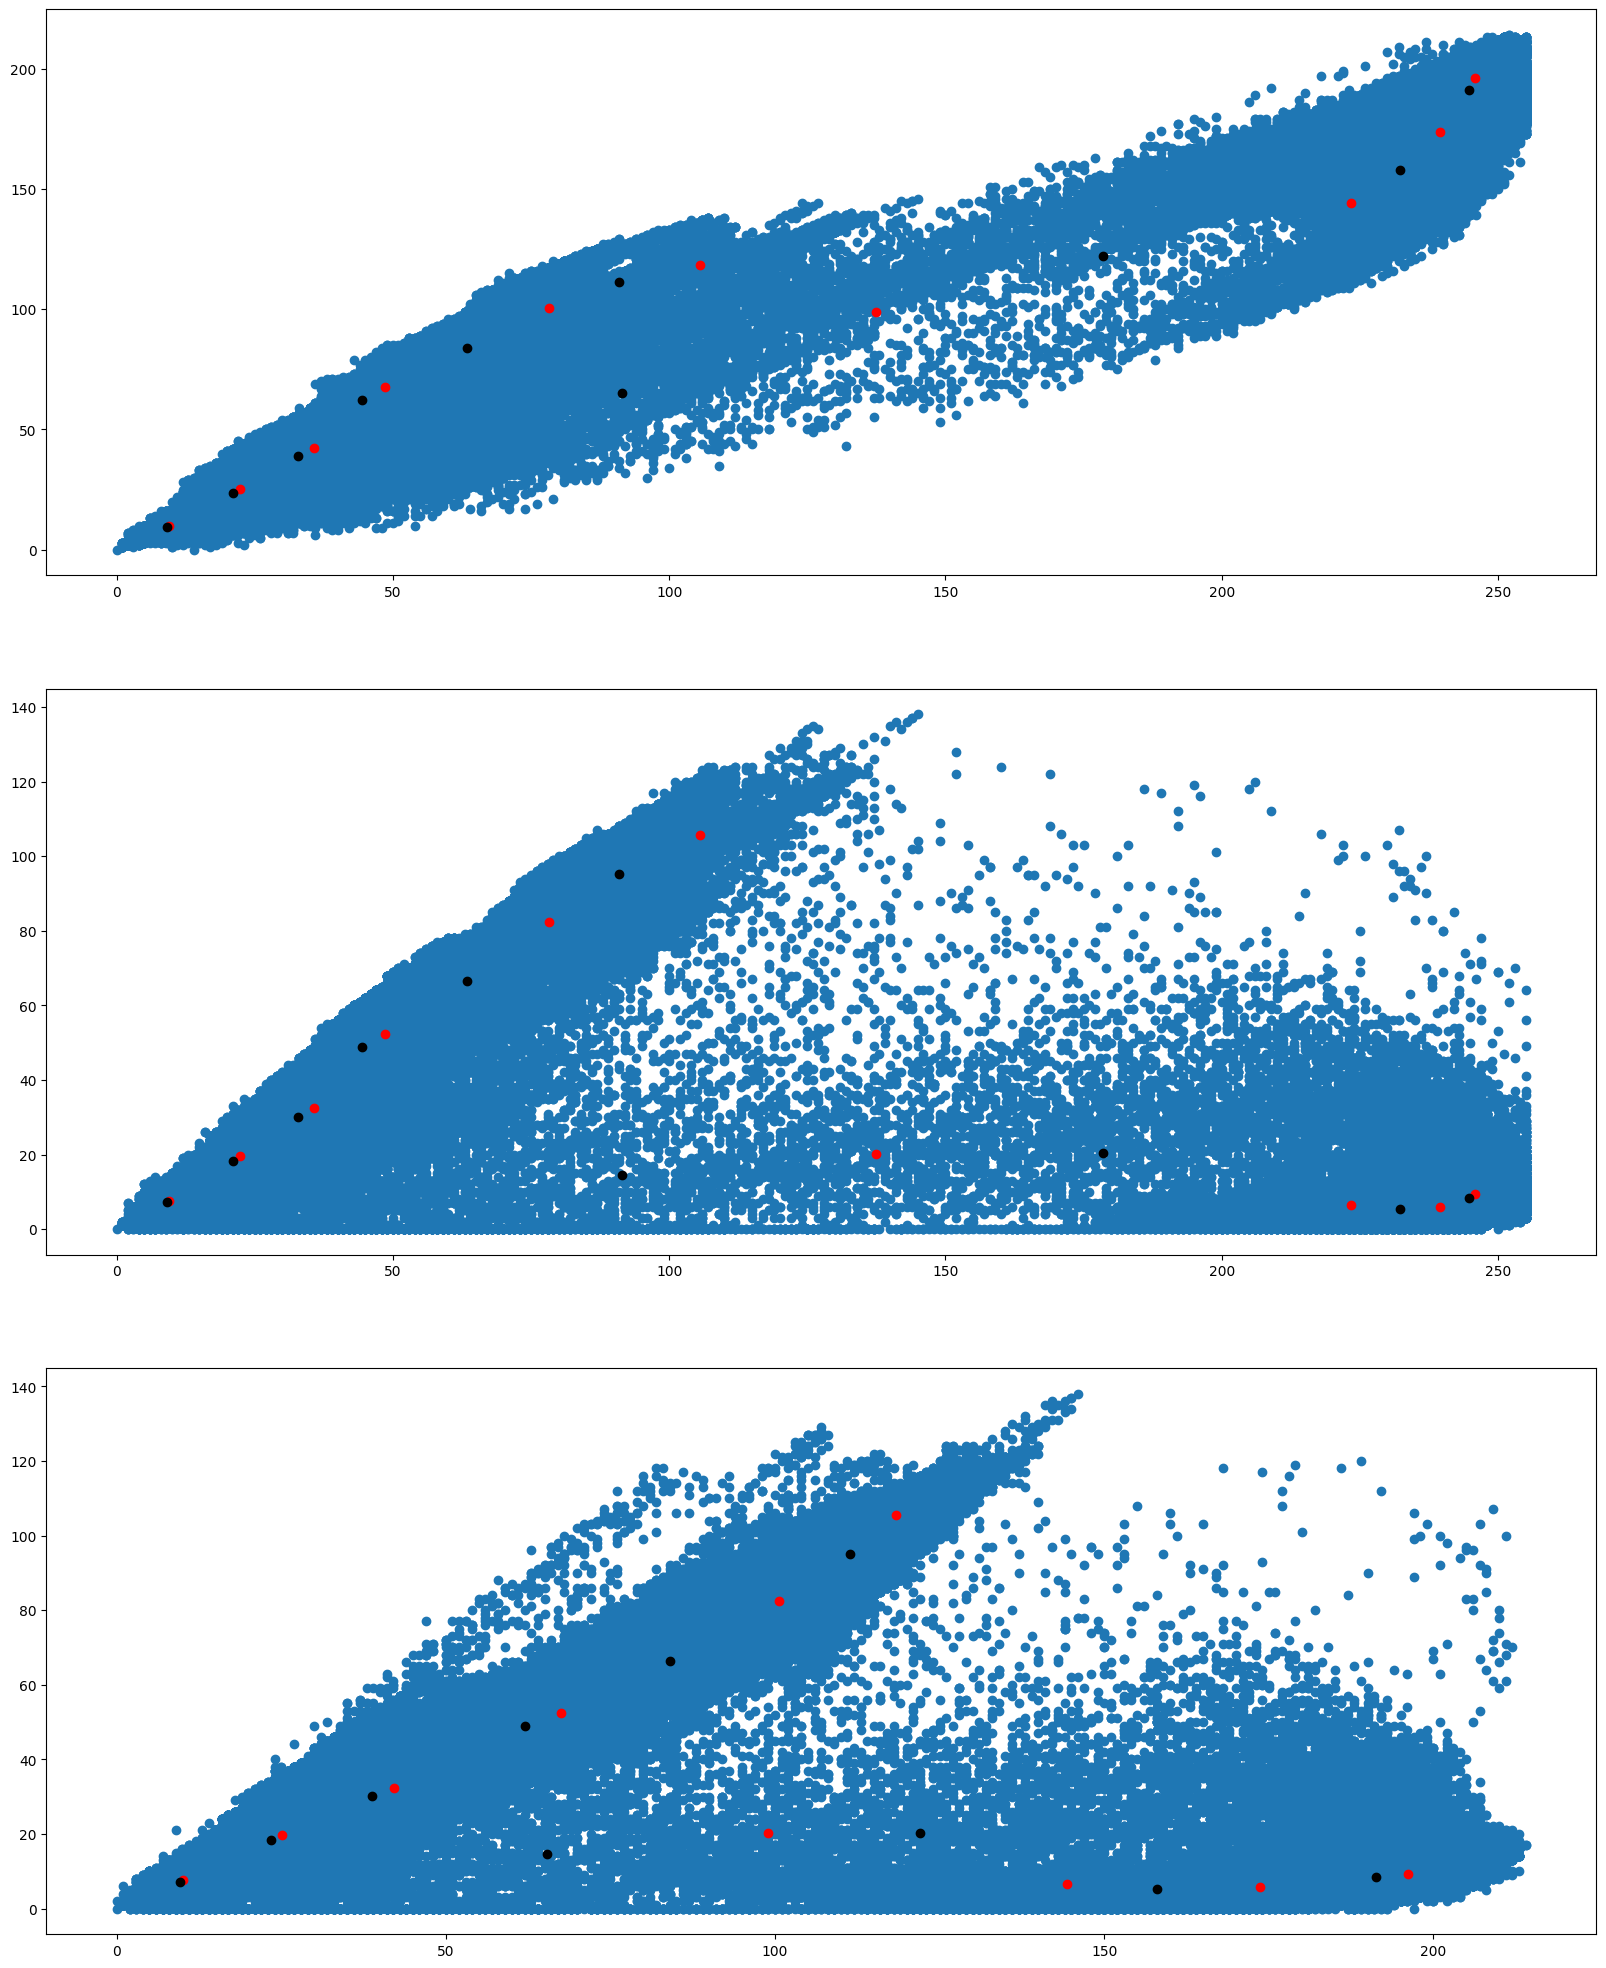

In [27]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

fig, axes = plot.subplots(nrows=3, ncols=1, figsize=(20, 25))
# Scatter plot for RG (RGB)
axes[0].scatter(numarray[:, 0], numarray[:, 1])
axes[0].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], c="red"
)
axes[0].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 1], c="black"
)

# Scatter plot of RB (RGB)
axes[1].scatter(numarray[:, 0], numarray[:, 2])
axes[1].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 2], c="red"
)
axes[1].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 2], c="black"
)

# Scatter plot of GB (RGB)
axes[2].scatter(numarray[:, 1], numarray[:, 2])
axes[2].scatter(
    clusters.cluster_centers_[:, 1], clusters.cluster_centers_[:, 2], c="red"
)
axes[2].scatter(
    mclusters.cluster_centers_[:, 1], mclusters.cluster_centers_[:, 2], c="black"
)

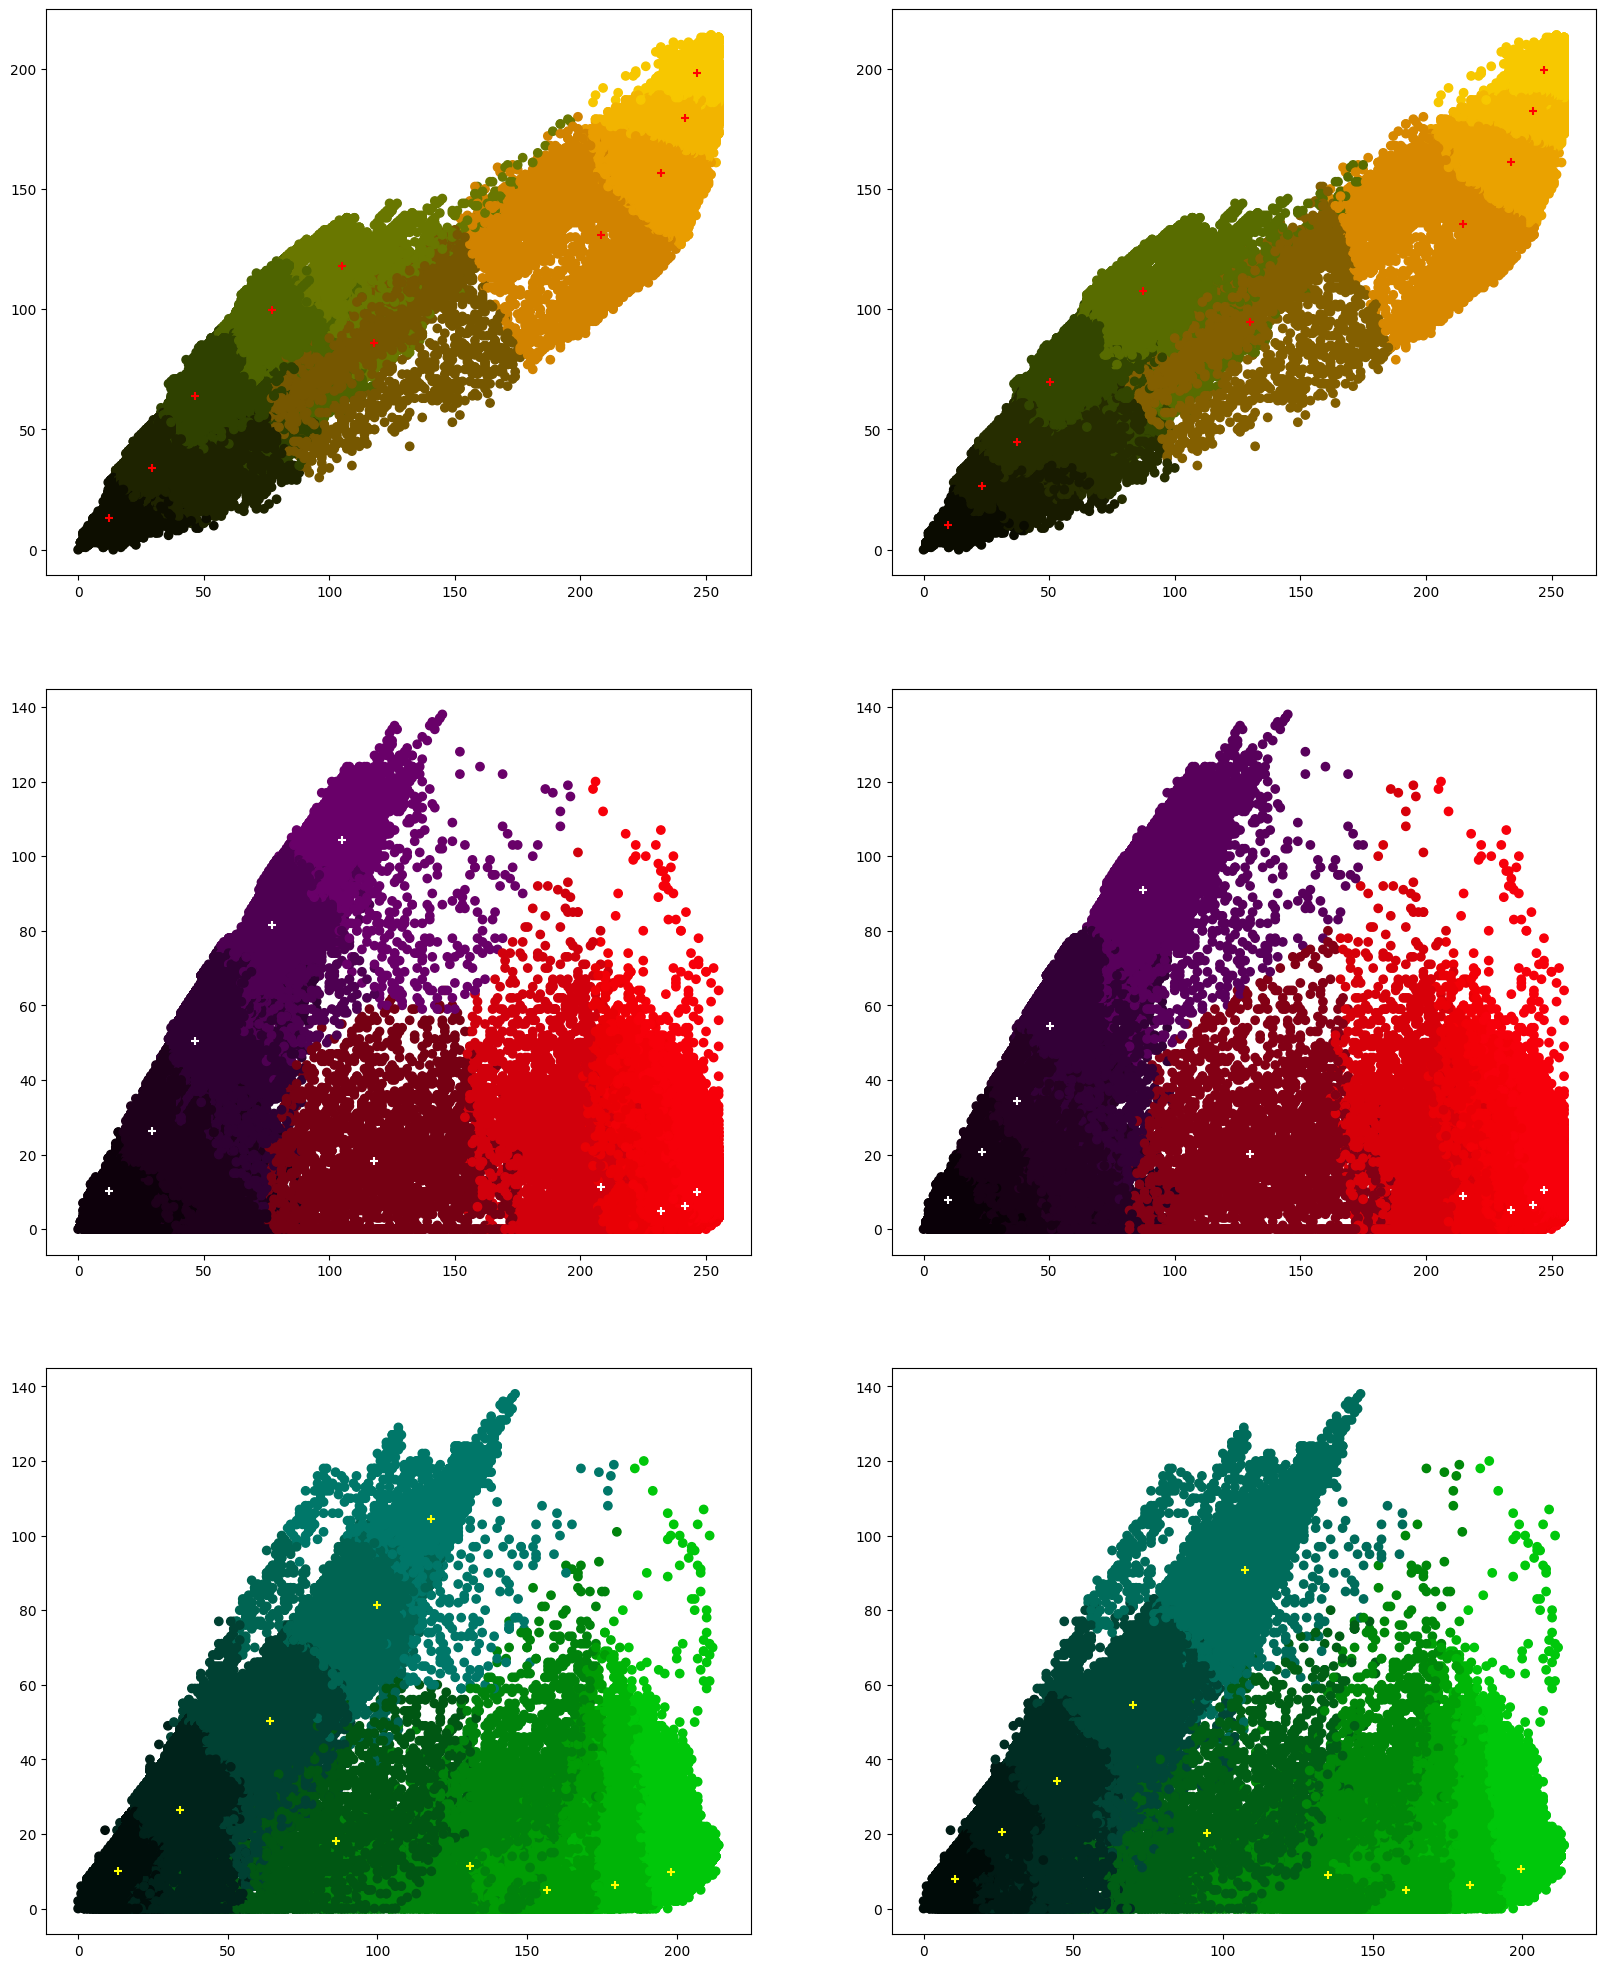

In [28]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("images/flower.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

cluster_count = 10

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

fig, axes = plot.subplots(nrows=3, ncols=2, figsize=(20, 25))

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            math.ceil(mclusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 0].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            0,
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[1, 0].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(mclusters.cluster_centers_[j][1]),
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[2, 0].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 0].scatter(
    mclusters.cluster_centers_[:, 1],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            math.ceil(clusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 1].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            0,
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[1, 1].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(clusters.cluster_centers_[j][1]),
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[2, 1].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 1].scatter(
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)
plot.show()

Distribution des Couleurs :

Chaque graphique représente deux dimensions de l'espace de couleur RGB (RG, RB et GB). Ceci nous permet de voir comment les pixels sont distribués selon ces combinaisons de couleurs et comment ils sont regroupés par les algorithmes.
Les points colorés montrent les pixels de l'image attribués à chaque cluster. Les couleurs sont déterminées par les centres de cluster, mais avec une dimension (soit R, G, ou B) mise à zéro pour mieux visualiser les regroupements en deux dimensions.
Centres des Clusters :

Les marqueurs + indiquent l'emplacement des centres des clusters dans l'espace de couleur réduit. Ces centres représentent la couleur moyenne des pixels qui sont regroupés ensemble.
Les couleurs des centres sont créées en prenant les valeurs moyennes de rouge, vert et bleu pour tous les pixels dans chaque cluster et en les convertissant en couleur hexadécimale.
Comparaison des Algorithmes :

Il y a une comparaison côte à côte des résultats de KMeans et MiniBatchKMeans. MiniBatchKMeans est une version approximative de KMeans qui est plus rapide mais peut être moins précise. La comparaison peut montrer des différences dans le positionnement des centres de cluster ou la répartition des pixels entre les clusters.
Performance :

Sans les données de performance, nous ne pouvons pas dire quel algorithme a performé mieux en termes de vitesse ou de précision. Toutefois, on peut s'attendre à ce que MiniBatchKMeans soit plus rapide sur de grands ensembles de données, au détriment de la précision des résultats.
En conclusion, ces graphiques illustrent les tendances de couleur dans l'image et la manière dont ces tendances sont capturées par les algorithmes de clustering. Ils ne donnent pas seulement un aperçu visuel des couleurs dominantes, mais aussi de la structure des données de couleur dans l'image. Par exemple, si certains clusters sont largement dispersés, cela pourrait indiquer une variété de nuances pour une couleur donnée. D'autre part, des clusters plus concentrés pourraient indiquer des couleurs plus uniformes dans l'image.